<a href="https://colab.research.google.com/github/Brenelle/HeartDisease_prediction_using_ANN/blob/main/Heart_Disease_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import all the required libraries**

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

**Import dataset**

In [ ]:
data=pd.read_csv('/content/Dataset--Heart-Disease-Prediction-using-ANN.csv')

Top 10 records

In [ ]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**num_cols indicates a numeric list of columns**

In [ ]:
num_cols=[]
for columns in data.columns:
  if((data[columns].dtype != 'object') & (data[columns].nunique() >2)):
    num_cols.append(columns)

In [ ]:
print(num_cols)

['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']


**Visualize the box plot and infer the outliers present in the numeric column**

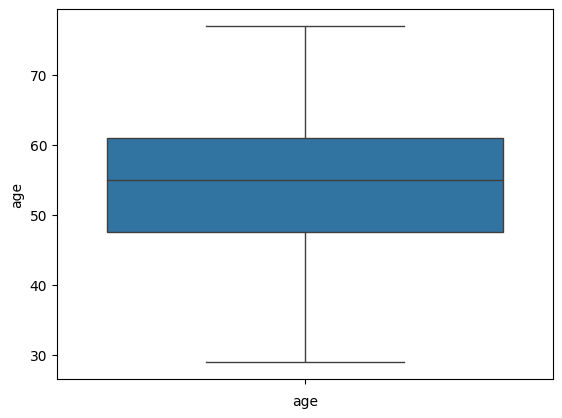

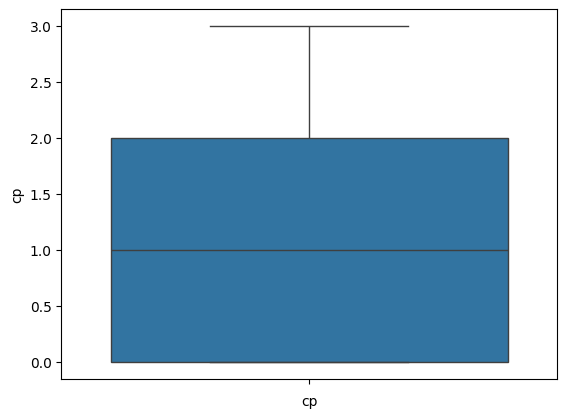

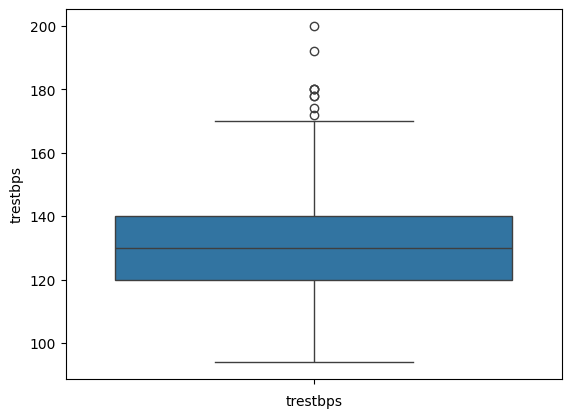

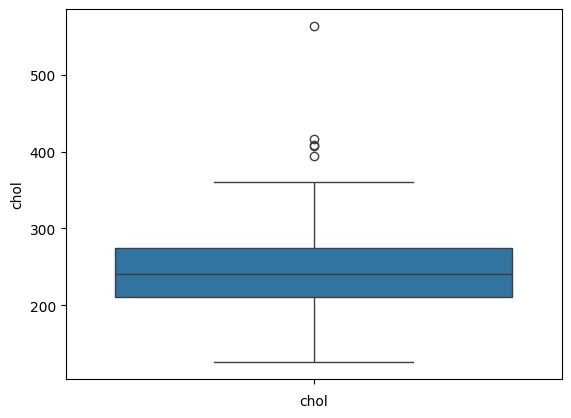

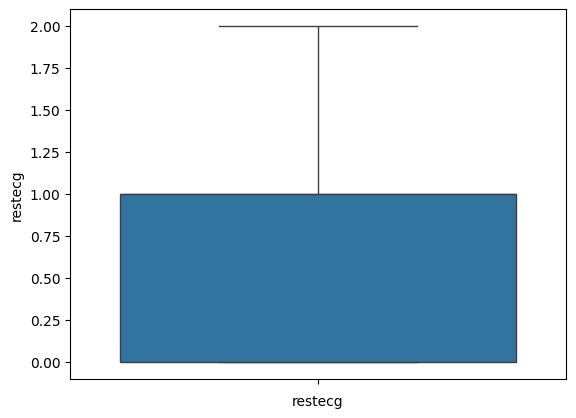

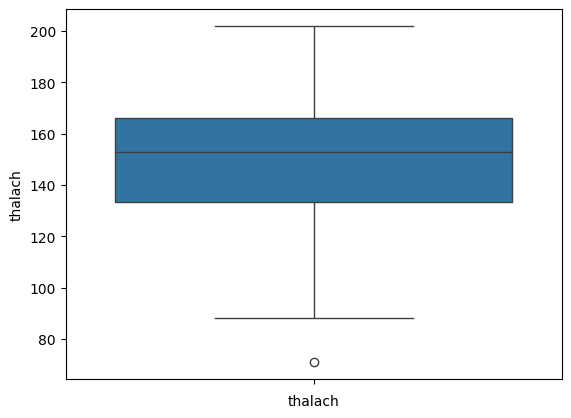

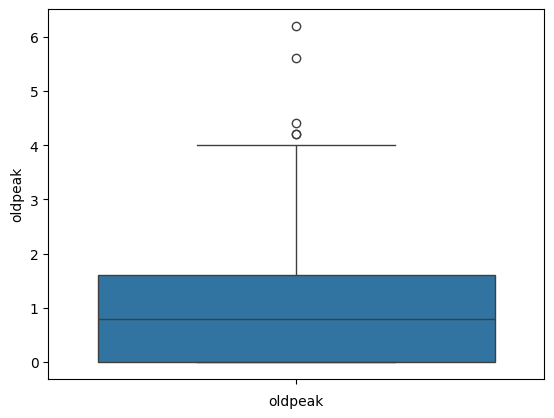

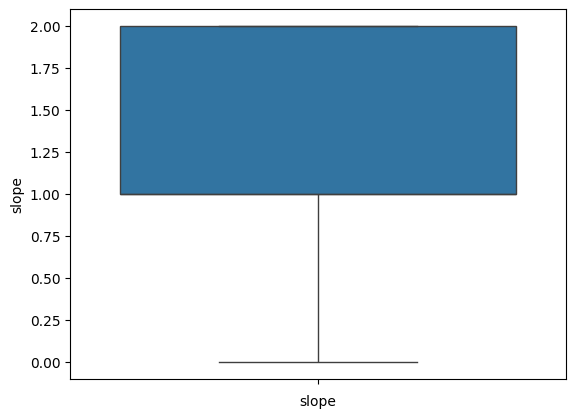

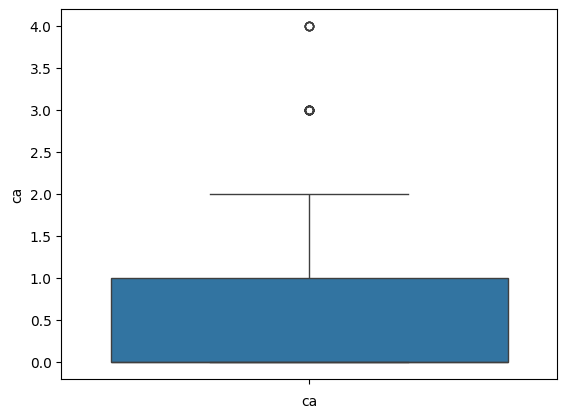

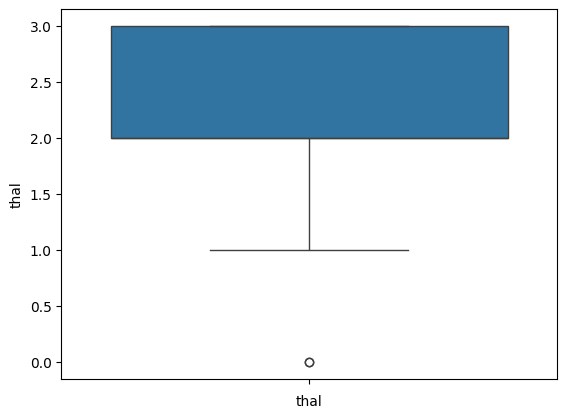

In [ ]:
for columns in num_cols:
  sns.boxplot(data[columns])
  plt.xlabel(columns)
  plt.show()

**Finding out the max and min in bloxplot and remove those records which are out of range in order to remove the outliers**

In [ ]:
for columns in num_cols:
  q3,q1=np.percentile(data[columns],[75,25])
  IQR=q3-q1
  max_boxplot=q3+1.5*IQR
  min_boxplot=q1 - 1.5*IQR
  data=data[(data[columns]>min_boxplot) & (data[columns]<max_boxplot)]

In [ ]:
data.shape

(256, 14)

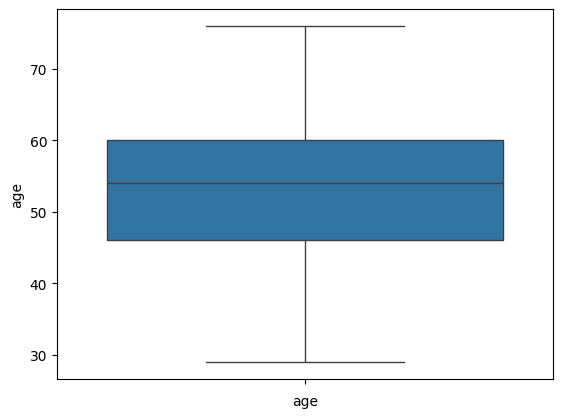

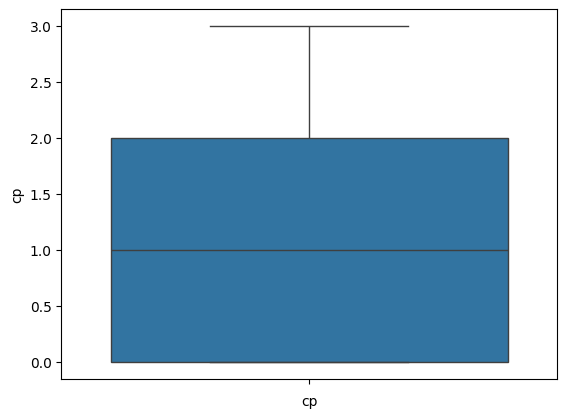

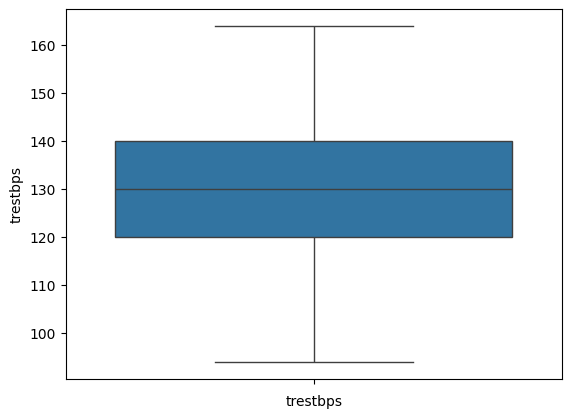

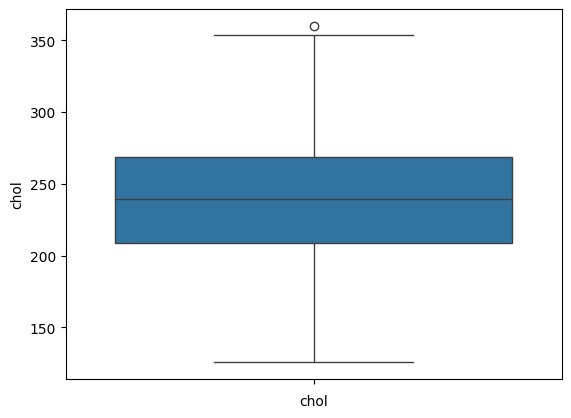

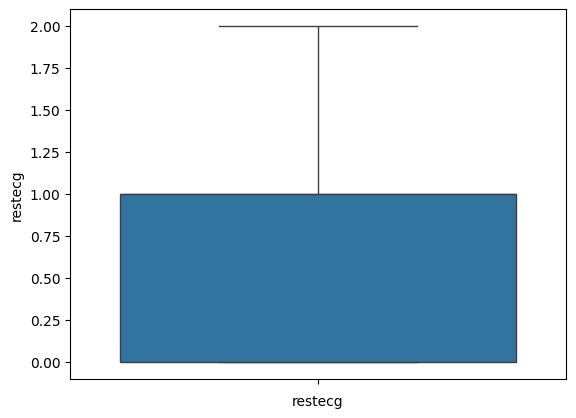

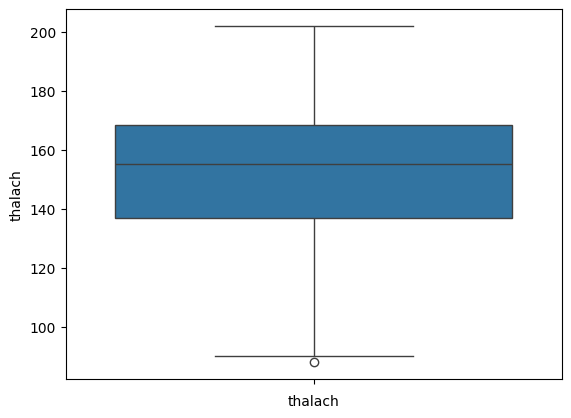

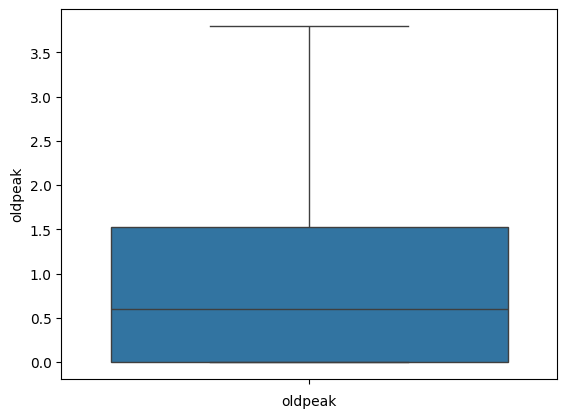

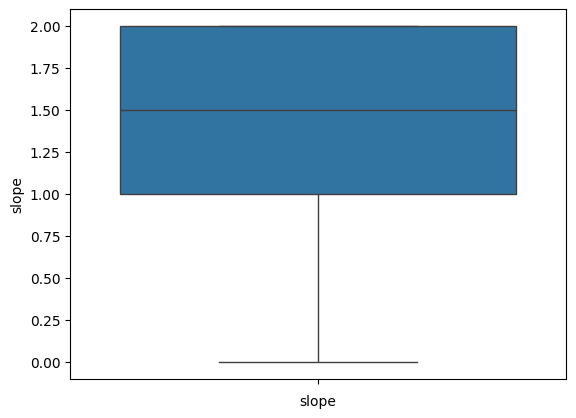

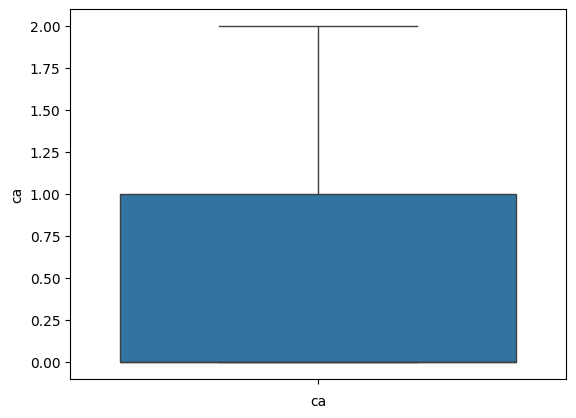

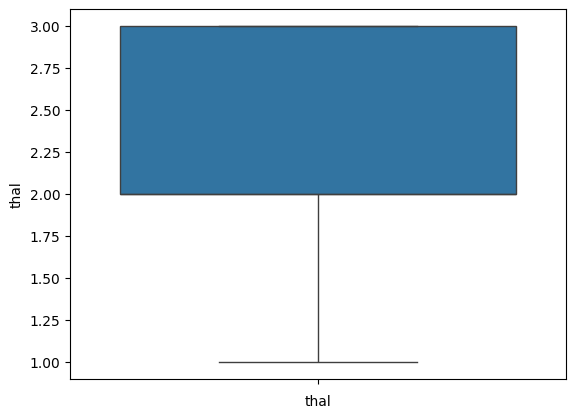

In [ ]:
for columns in num_cols:
  sns.boxplot(data[columns])
  plt.xlabel(columns)
  plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       256 non-null    int64  
 1   sex       256 non-null    int64  
 2   cp        256 non-null    int64  
 3   trestbps  256 non-null    int64  
 4   chol      256 non-null    int64  
 5   fbs       256 non-null    int64  
 6   restecg   256 non-null    int64  
 7   thalach   256 non-null    int64  
 8   exang     256 non-null    int64  
 9   oldpeak   256 non-null    float64
 10  slope     256 non-null    int64  
 11  ca        256 non-null    int64  
 12  thal      256 non-null    int64  
 13  target    256 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 30.0 KB


**Number of mising  values present inside the features**

In [ ]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


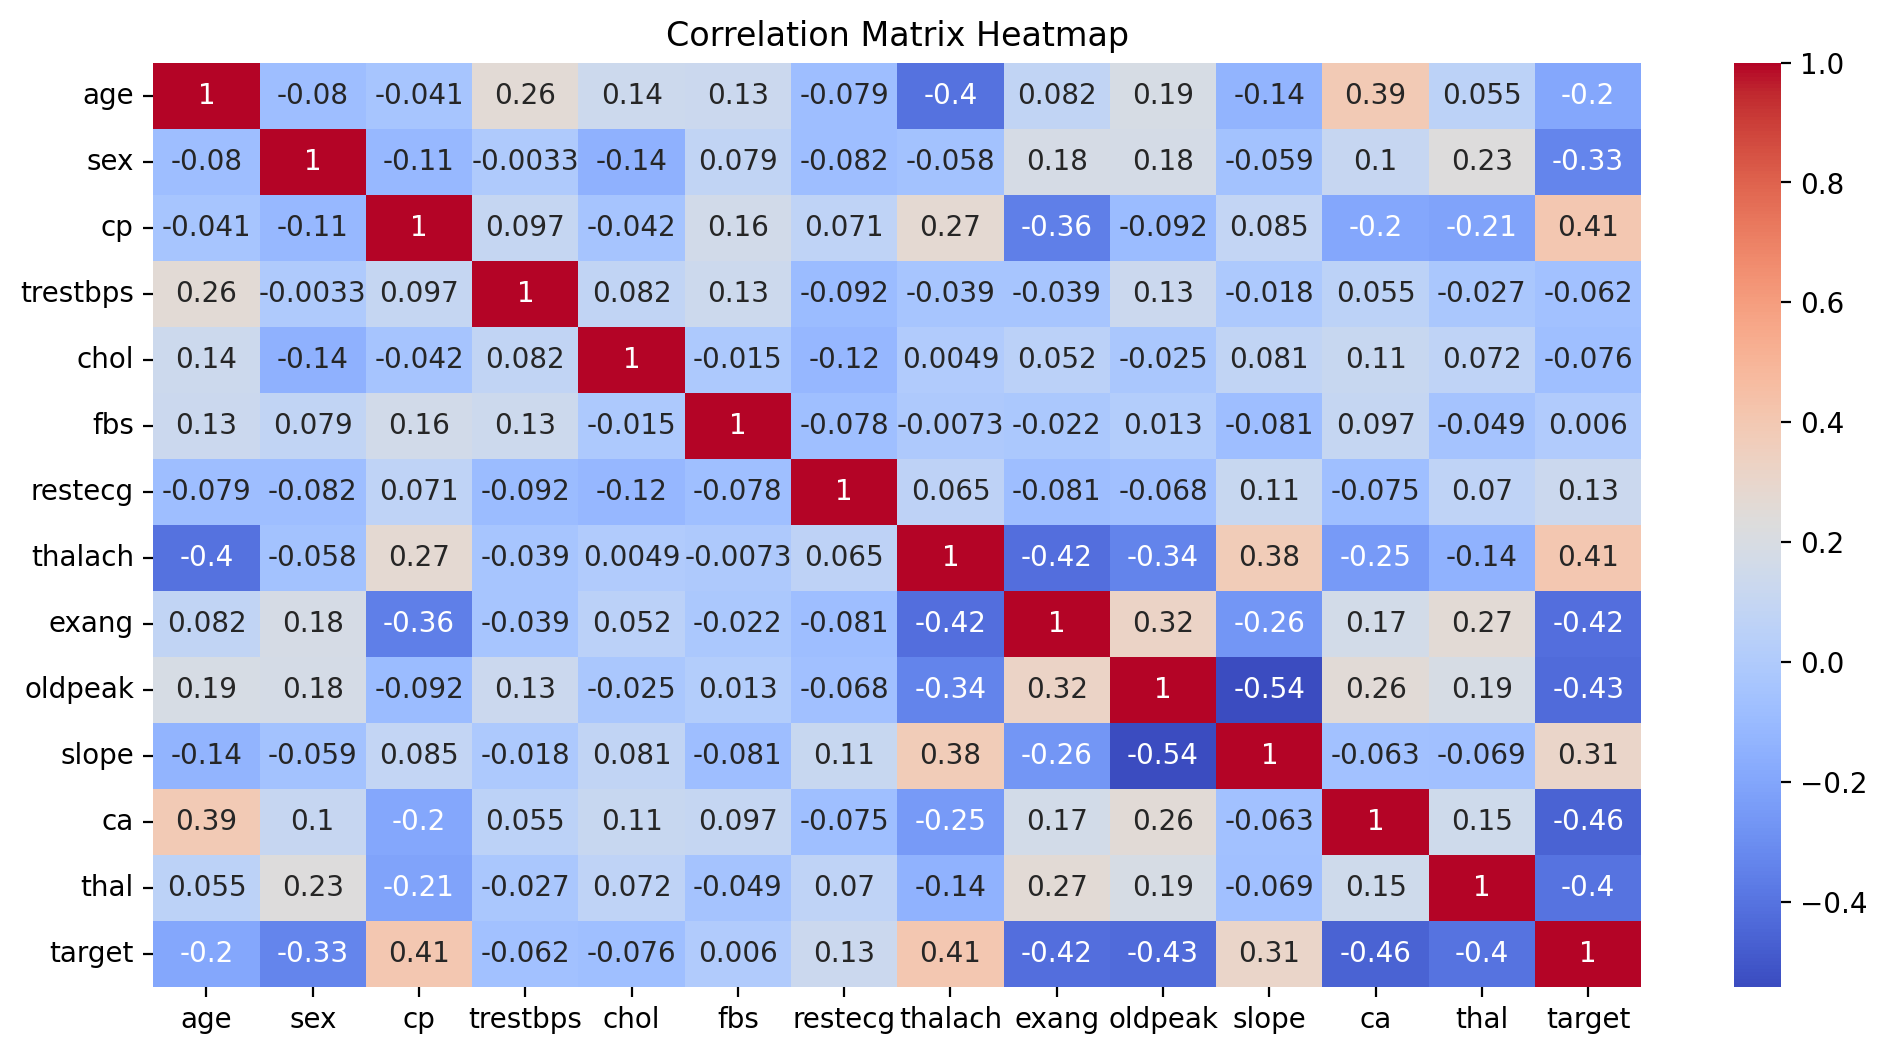

In [ ]:
plt.figure(figsize=(12,6),dpi=200)
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [43]:
x = data.iloc[:,:13].values
y = data["target"].values

**Data splitting on tain and test**

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [62]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

**Building an model using the activation function**

In [73]:
classifier = Sequential()
classifier.add(Dense(activation = "relu", input_dim = 13,
                     units = 8, kernel_initializer = "uniform"))
classifier.add(Dense(activation = "relu", units = 14,
                     kernel_initializer = "uniform"))
classifier.add(Dense(activation = "sigmoid", units = 1,
                     kernel_initializer = "uniform"))
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy',
                   metrics = ['accuracy'] )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
classifier.fit(x_train , y_train , batch_size = 8 ,epochs = 100  )

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.5764 - loss: 0.6906
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6327 - loss: 0.6748
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6062 - loss: 0.6662 
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6294 - loss: 0.6515 
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6645 - loss: 0.6235 
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6602 - loss: 0.6452 
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6081 - loss: 0.6279 
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6598 - loss: 0.6037 
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6854 - loss: 0.6094 
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7187 - loss: 0.5813 
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7047 - loss: 0.5871 
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

In [77]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step


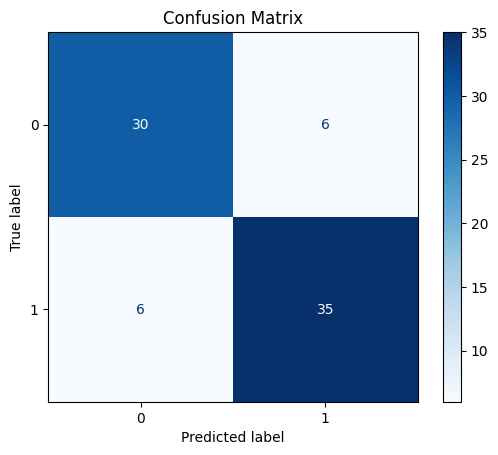

In [82]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [79]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print(accuracy*100)

84.4155844155844
